### Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [16]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
df.head()

,Close,High,Low,Open,Volume,log_return,SMA_short,SMA_long,volatility,open_close_ratio,high_low_range,volume_zscore
Date,,,,,,,,,,,,
2017-05-28,2155.800049,2267.340088,2054.080078,2054.080078,1147139968,0.055766,1984.145477,1582.371790,0.047429,0.952816,0.098924,-0.067848
2017-05-29,2255.610107,2307.050049,2107.169922,2159.429932,994625024,0.045259,2009.157983,1603.726592,0.048020,0.957360,0.088615,-0.354345
2017-05-30,2175.469971,2301.959961,2124.570068,2255.360107,1443970048,-0.036176,2028.574982,1623.493391,0.049210,1.036723,0.081541,0.488986
2017-05-31,2286.409912,2311.080078,2145.570068,2187.189941,1544829952,0.049738,2050.466980,1645.121389,0.049744,0.956604,0.072389,0.620223
2017-06-01,2407.879883,2448.389893,2288.330078,2288.330078,1653180032,0.051764,2084.648975,1669.271587,0.046753,0.950351,0.066473,0.755352


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2775 entries, 2017-05-28 to 2024-12-31
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             2775 non-null   float64
 1   High              2775 non-null   float64
 2   Low               2775 non-null   float64
 3   Open              2775 non-null   float64
 4   Volume            2775 non-null   int64  
 5   log_return        2775 non-null   float64
 6   SMA_short         2775 non-null   float64
 7   SMA_long          2775 non-null   float64
 8   volatility        2775 non-null   float64
 9   open_close_ratio  2775 non-null   float64
 10  high_low_range    2775 non-null   float64
 11  volume_zscore     2775 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 281.8 KB


In [18]:
df.isnull().sum()

Close               0
High                0
Low                 0
Open                0
Volume              0
log_return          0
SMA_short           0
SMA_long            0
volatility          0
open_close_ratio    0
high_low_range      0
volume_zscore       0
dtype: int64

### Feature engineering

In [19]:
df.asfreq("B")
df = df.ffill()

In [20]:
df.isnull().sum()

Close               0
High                0
Low                 0
Open                0
Volume              0
log_return          0
SMA_short           0
SMA_long            0
volatility          0
open_close_ratio    0
high_low_range      0
volume_zscore       0
dtype: int64

In [21]:
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))
df["SMA_short"] = df["Close"].rolling(window=20).mean()
df["SMA_long"] = df["Close"].rolling(window=50).mean()
df["volatility"] = df["log_return"].rolling(window=20).std()
df["open_close_ratio"] = df["Open"] / df["Close"]
df["high_low_range"] = (df["High"] - df["Low"]) / df["Close"]
df["volume_zscore"] = (df["Volume"] - df["Volume"].rolling(20).mean()) / df[
    "Volume"
].rolling(20).std()

In [22]:
df.isnull().sum()

Close                0
High                 0
Low                  0
Open                 0
Volume               0
log_return           1
SMA_short           19
SMA_long            49
volatility          20
open_close_ratio     0
high_low_range       0
volume_zscore       19
dtype: int64

In [23]:
df.shape

(2775, 12)

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(2726, 12)

### Visualization

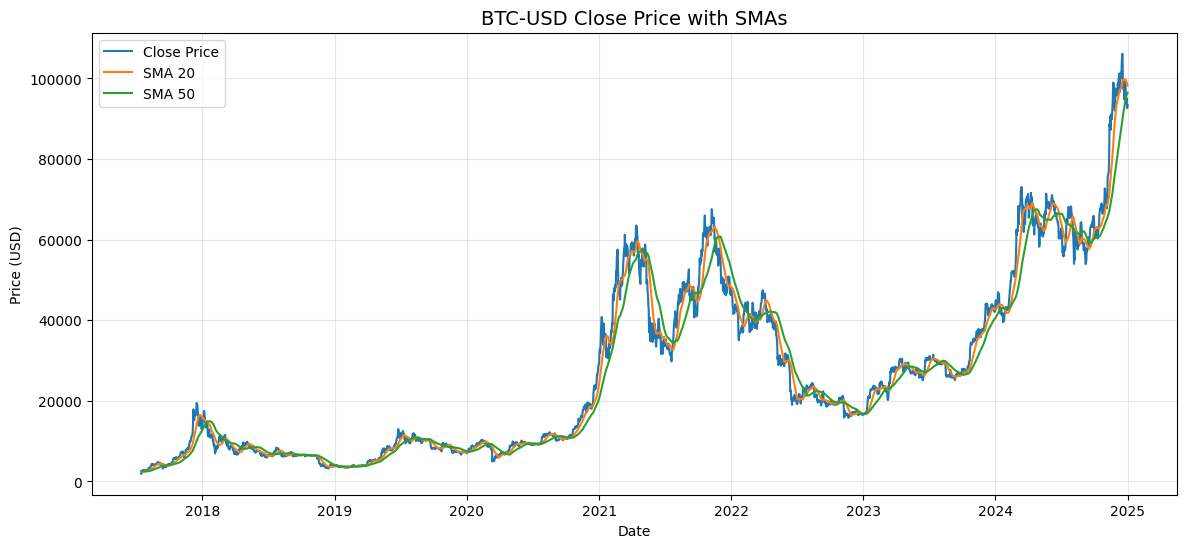

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Close Price", linewidth=1.5)
plt.plot(df.index, df["SMA_short"], label=f"SMA 20")
plt.plot(df.index, df["SMA_long"], label=f"SMA 50")
plt.title("BTC-USD Close Price with SMAs", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

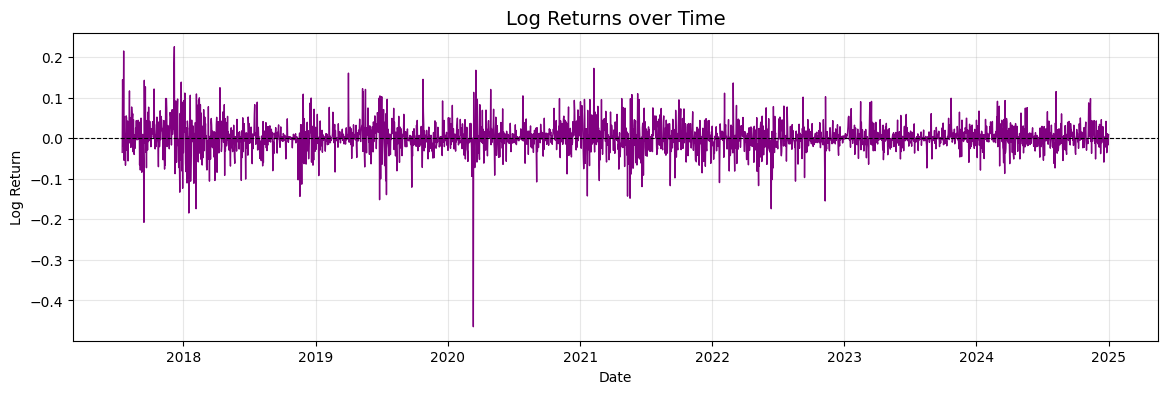

In [27]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["log_return"], color="purple", linewidth=1)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Log Returns over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(alpha=0.3)
plt.show()

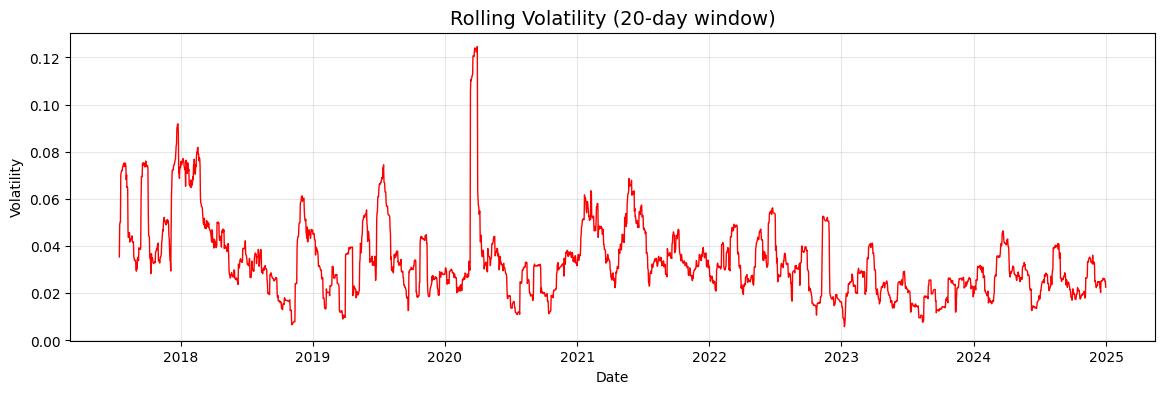

In [28]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["volatility"], color="red", linewidth=1)
plt.title(f"Rolling Volatility (20-day window)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(alpha=0.3)
plt.show()

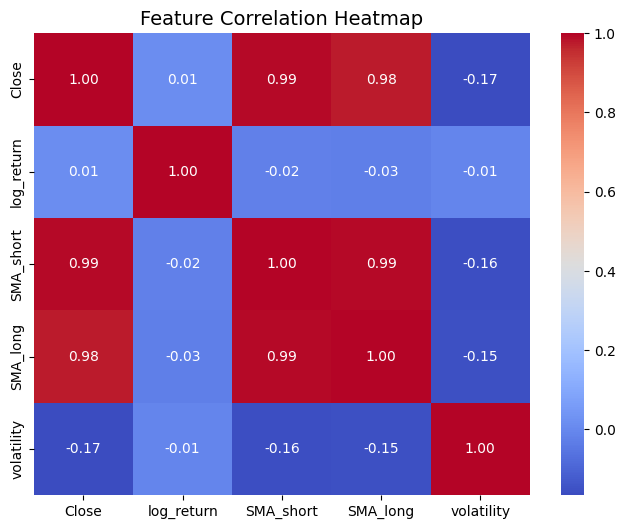

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[["Close", "log_return", "SMA_short", "SMA_long", "volatility"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [30]:
df.to_csv("data.csv", index=True)